

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis.

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques:
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

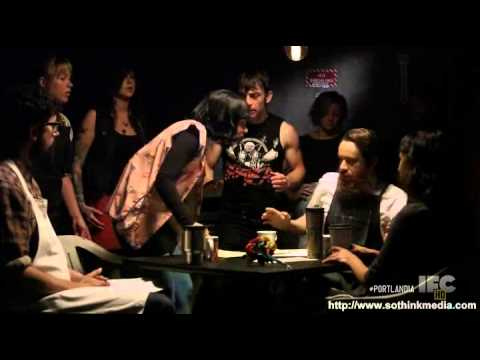

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Jml7NVYm8cs')

#0. Prepare

## 0.1 Get spacy

In [2]:
# Locally (or on colab) let's use en_core_web_lg
!python -m spacy download en_core_web_md # Can do lg, takes awhile
# Also on Colab, need to restart runtime after this step!

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## 0.2 Restart runtime!

## 0.3 Install packages and do imports

In [3]:
!pip install squarify

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify

-----

## 0.4 Get data

In [5]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [6]:
df['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [7]:
# This does the same as the one above
df.full_review_text.iloc[0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

# 1 Practice: Clean, tokenize, remove stop words, lemmatize

## 1.0 Save Dates for later use (optional)
Each Review starts with a date, we could grab this date and add it as a new column on our dataframe if we want. This could be a valuable feature later on. This isn't absolutely necessary, but might be a good idea. Otherwise we might just be throwing away this useful information when we clean the text.



In [8]:
# grab date from the beginning of the review text
def get_date(text):
  return text.split(' ')[1]

df['date'] = df['full_review_text'].apply(get_date)

In [9]:
df

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,2/19/2015
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,1/21/2016
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,4/30/2015
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,8/2/2015


In [10]:
# computationall efficient way to iterate through rows is using iterrows
# we just want to see the print out of few reviews to get an idea of the quality of our text data (ie. how messy is it?)

def print_out_N_reviews(N, df, col_name="full_review_text"):
    '''
    Prints out <N> number of text reviews for a specified column <col_name>

    Parameters
    ----------
    N: int
        Number of text reviews to print out

    df: pandas dataframe

    col_name: string
        Column name where the text reviews are stored

    Returns
    -------
    None
    '''

    counter = 0
    # by using double brackets in df[[col_name]] the data type stays as a dataframe instead of become a Series had we used single brackets
    for row_id, row in df[[col_name]].iterrows():

        text = row[0] # get column data
        print(text)
        print(  "  ") # create a black line for ease of reading
        if counter == N:
            break
        counter += 1

In [11]:
N = 5
print_out_N_reviews(N, df)

 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? 
  
 12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about.  But, will probably be back just to be somewhere unique and nice. 
  
 11/30/2016 1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and

In [12]:
# Another approach (we could also use regular expressions to grab the dates)
import re

def find_first_date(text):
  #return re.findall('\d+\/\d+\/\d+', text)[0]
  return re.findall(r'\d+/\d+/\d+', text)[0]

example_text = " 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? "

find_first_date(example_text)

'11/25/2016'

In [13]:
print(df['date'].iloc[0])
print(type(df['date'].iloc[0]))

11/25/2016
<class 'str'>


In [14]:
# turn date column strings into datetime objects
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

<ipython-input-14-732854faf529>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)


In [15]:
print(type(df['date'][0]))
print(df['date'].iloc[0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2016-11-25 00:00:00


In [16]:
dir(df['date'].iloc[0])

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_creso',
 '_date_repr',
 '_from_dt64',
 '_from_value_and_reso',
 '_repr_base',
 '_round',
 '_short_repr',
 '_time_repr',
 '_value',
 'as_unit',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_mon

In [17]:
df['date'].iloc[0].day_name()

'Friday'

In [18]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03


In [19]:
df['star_rating'].unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

In [20]:
df['star_rating'].value_counts()

star_rating
 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: count, dtype: int64

In [21]:
# looks like most dates are in late 2016
df['date'].value_counts()

date
2016-10-09    31
2016-09-18    30
2016-11-20    27
2016-11-02    27
2016-12-02    26
              ..
2012-03-06     1
2011-10-29     1
2012-03-14     1
2012-10-03     1
2013-01-09     1
Name: count, Length: 1592, dtype: int64

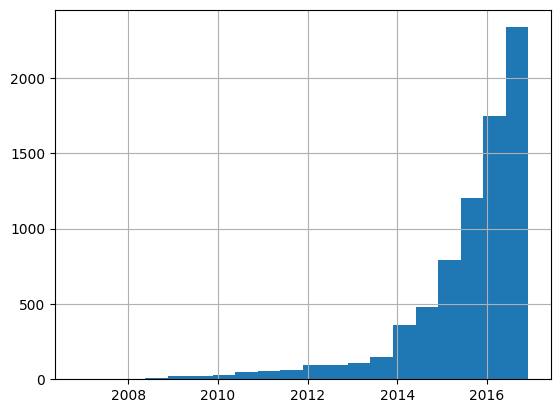

In [22]:
# histogram of review dates to see when most reviews were left
# just a little EDA
df['date'].hist(bins=20);

## 1.1 Clean Review Text (with Regular Expressions `regex`)
dataquest has a good [regex reference](https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf
)

It looks like the reviews have the following characteristics

- Date at the beginning
- Lots of punctuation
- Use special characters like $ (as well as dollar amounts)
- Upper and lower case words

In [23]:
import re
# considering using regex to remove dates
# you can create and test regular expressions on this online regex editor: https://regex101.com/

def clean_data(text):
    """
    Accepts a single text document and performs several regex substitutions in order to clean the document.

    Parameters
    ----------
    text: string or object

    Returns
    -------
    text: string or object
    """

    # order of operations - apply the expression from top to bottom
    date_regex = r"\d+/\d+/\d+"
    punct_regex = r"[^0-9a-zA-Z\s]" # any non-alphanumeric chars
    special_chars_regex = r"[\$\%\&\@+]"
    numerical_regex =  r"\d+"  # match one or more digits

    # Replace any strings matching the above regex patterns with blank strings
    # (effectively removing them from the text)
    text = re.sub(date_regex, "", text)
    text = re.sub(punct_regex, "", text)
    text = re.sub(special_chars_regex, "", text)
    text = re.sub(numerical_regex, "", text)

    # match one or more whitespace chars
    whitespace_regex = r"\s+"
    # replace one or more whitespace characters with a single white space char
    #    not a blank string!
    text = re.sub(whitespace_regex, " ", text)


    # # apply case normalization
    # text = YOUR CODE HERE
    return text.lower()

In [24]:
df['cleaned_review'] = df['full_review_text'].apply(clean_data)

df['cleaned_review'][0]

' checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas '

In [25]:
df.full_review_text = df.full_review_text.apply(lambda text: clean_data(text))

In [26]:
N = 5
print_out_N_reviews(N, df, col_name="full_review_text")

 checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas 
  
 listed in date night austin ambiance in austin beautiful love the ambiance instagramworthy definitely so be prepared this is gonna cost you a pretty penny waffle dessert was just decentnothing to rave about but will probably be back just to be somewhere unique and nice 
  
 checkin listed in brunch spots i loved the eclectic and homey plush decor and who doesnt want to swing and drink their coffee i would categorize this as a pricier coffee place but to me it w

## 1.2. Tokenize the cleaned up reviews

In [27]:
# with a for loop
tokens = []
for review in df['cleaned_review']:
  tokens.append(review.split(' '))

df['tokens'] = tokens

df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere every ...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every ...,"[, checkin, love, love, loved, the, atmosphere..."
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austi...,4.0 star rating,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ..."
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ec...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ec...,"[, checkin, listed, in, brunch, spots, i, love..."
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat..."
4,The Factory - Cafe With a Soul,checkin they are located within the northcros...,4.0 star rating,2016-12-03,checkin they are located within the northcros...,"[, checkin, they, are, located, within, the, n..."


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   coffee_shop_name  7616 non-null   object        
 1   full_review_text  7616 non-null   object        
 2   star_rating       7616 non-null   object        
 3   date              7616 non-null   datetime64[ns]
 4   cleaned_review    7616 non-null   object        
 5   tokens            7616 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 357.1+ KB


In [ ]:
# # with a list comprehension
# df['tokens'] = YOUR CODE HERE
# df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, the, atmosphere, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austin...,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, in, brunch, spots, i, loved,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howev...,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,checkin they are located within the northcross...,"[checkin, they, are, located, within, the, nor..."


### 1.3 Visualize the most common tokens
Below is the `count()` function that we used in the lecture.

In [29]:
from collections import Counter

def count(token_lists):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)

    Parameters
    ----------
    tokens: pandas Series or list of lists

    Returns
    -------
    wc: pandas DataFrame
    """
    # stores the count of each token
    word_counts = Counter()

    # stores the number of docs that each token appears in
    appears_in_docs = Counter()

    total_docs = len(token_lists)

    for token_list in token_lists:
        # stores count of every appearance of a token
        word_counts.update(token_list)

        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in_docs.update(set(token_list))

    # build word count dataframe
    word_count_dict = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(word_count_dict, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['fraction_of_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts
    wc = wc.sort_values(by='rank')
    wc['cumulative_fraction_of_total'] = wc['fraction_of_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in_docs.keys(), appears_in_docs.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in_docs'])

    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_fraction_of_docs'] = wc['appears_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

#### Summary of the descriptive token statistics

`word` The specific token that is being analyzed

`appears_in_docs` Number of documents that the word/token appears in

`count` The total number of appearances of that token within the corpus

`rank` Ranking of tokens by count

`fraction_of_total` Fraction of the total tokens that this token makes up

`cumulative_fraction_of_total` Sum of fractional total of ranked tokens, down to and including this token.

`appears_in_fraction_of_docs` Fraction of documents that token appears in

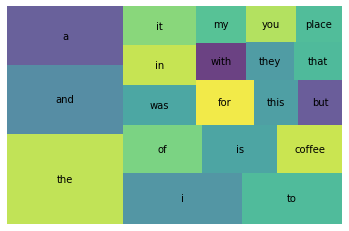

In [ ]:
# # visualize the 20 most common tokens with squarify
# # Lots of stopwords!

# #YOUR CODE HERE
# wc =


# squarify.plot(sizes=, label=, alpha=.8 )
# #
# plt.axis('off')
# plt.show()

## 1.4 Clean, tokenize, remove stopwords, and lemmatize the reviews (with Spacy)

We can do all of the above with Spacy, but Spacy has the added benefit of making it easy to lemmatize tokens and remove stop words as well! Let's write a tokenize function with Spacy.

In [31]:
import spacy
# import the large version of the pre-trained model
# depending on your computational resources/limitations, you might need to download and load in a smaller version of the model
# see the spaCy docs: https://spacy.io/models/en
nlp = spacy.load('en_core_web_md')

## Remove stop word, punctuation and whitespace from each token

In [32]:
# the below method is what was on the homework assignment, above is what the solution video said to do

def tokenizer(text):

    # Pass the text into the spacy pre-trained model so that we can then use the useful spacy functionality
    doc = nlp(text)

    # Provide a stop word filter (i.e. remove stop words) and a white space filter (i.e. remove tokens that are white spaces)
    return [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_space != True)]

In [34]:
# DONT USE RIGHT NOW, COME BACK TO IT

# this will take longer to run than a regex method because Spacy is doing a fair amount
# of extra stuff under the hood in creating the token attributes and everything.

def spacy_tokenizer(text):
    """
    Use the pre-trained model from Space to tokenize our text into lemmas

    Notes
    -----
    Rememeber that the pre-trained spaCy model has a lot of built in flags for what kind of token each token is
    so we can use that functionality to create filters for stop words, white spaces, punctuation, and so on!

    See list of flags here: https://spacy.io/api/token#attributes

    Parameter
    ---------
    text: string
        Full text article/document that needs to be tokenized
    """
    tokens = []
    for token in nlp(text):
        # if statement will filter out stopwords, punctuation, and whitespace
        # COMPLETE THE CODE HERE
        if (token.is_stop != True) and (token.is_space != True):
            # Now lemmatize!
            tokens.append(token.lemma_)

    return tokens

In [36]:
df['full_review_text'][10]

' checkin listed in americano this is not your average cute study spot cafe location atmosphere easy parking at the lot cute and classy interior decor plenty of seats available couches swings high chairs etc games like chess tic tac toe available no sign of outlets charging port on the walls no wifi available not a study cafe unless you have all your papers printed out and dont need the internet service o you order by yourself using an ipad up at the counter there are ipads available making lines go by faster you can request them to text you upon your order being ready when i told one of the baristas that the fork bin was empty he kindly brought it over to our table along with a couple of knives there was no option to make drinks half sweetened less ice on the ipad screen food prices highly recommend the matcha latte it was thick and made to perfection the chicken and waffle was well seasoned aesthetically super cute i didnt enjoy the milk tea as much it was way too sweet for me and ha

In [37]:
# THIS IS THE HOMEWORK ASSIGNMENT VERSION, MAY OR MAY NOT USE

# This code cell takes ~ 3 minutes on Google Colab
%%time
# YOUR CODE HERE
df['spacy_tokens'] = df['full_review_text'].apply(lambda text: tokenizer(text))

CPU times: user 3min 36s, sys: 330 ms, total: 3min 37s
Wall time: 3min 43s


In [39]:
df["lemmas"] = df["full_review_text"].apply(lambda text: spacy_tokenizer(text))

In [41]:
df.lemmas.iloc[:5]

0    [checkin, love, love, love, atmosphere, corner...
1    [list, date, night, austin, ambiance, austin, ...
2    [checkin, list, brunch, spot, love, eclectic, ...
3    [cool, decor, good, drink, nice, seating, over...
4    [checkin, locate, northcross, mall, shopping, ...
Name: lemmas, dtype: object

In [42]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens,lemmas
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere every ...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every ...,"[, checkin, love, love, loved, the, atmosphere...","[checkin, love, love, love, atmosphere, corner...","[checkin, love, love, love, atmosphere, corner..."
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austi...,4.0 star rating,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ...","[list, date, night, austin, ambiance, austin, ...","[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ec...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ec...,"[, checkin, listed, in, brunch, spots, i, love...","[checkin, list, brunch, spot, love, eclectic, ...","[checkin, list, brunch, spot, love, eclectic, ..."
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat...","[cool, decor, good, drink, nice, seating, over...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,checkin they are located within the northcros...,4.0 star rating,2016-12-03,checkin they are located within the northcros...,"[, checkin, they, are, located, within, the, n...","[checkin, locate, northcross, mall, shopping, ...","[checkin, locate, northcross, mall, shopping, ..."


##1.5 Visualize the Spacy Tokens

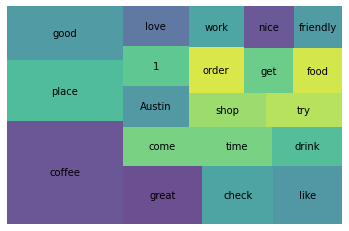

In [ ]:
wc = count(df['spacy_tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify... #YOUR CODE HERE
plt.axis('off')
plt.show()

# 2. Compare High and Low Coffeeshop reviews!

- We'll say that a "good" rating is 4 or 5 stars
- a "bad" rating is 3 stars or less

## 2.1 Create a numeric version of the star rating

In [43]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens,lemmas
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere every ...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every ...,"[, checkin, love, love, loved, the, atmosphere...","[checkin, love, love, love, atmosphere, corner...","[checkin, love, love, love, atmosphere, corner..."
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austi...,4.0 star rating,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ...","[list, date, night, austin, ambiance, austin, ...","[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ec...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ec...,"[, checkin, listed, in, brunch, spots, i, love...","[checkin, list, brunch, spot, love, eclectic, ...","[checkin, list, brunch, spot, love, eclectic, ..."
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat...","[cool, decor, good, drink, nice, seating, over...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,checkin they are located within the northcros...,4.0 star rating,2016-12-03,checkin they are located within the northcros...,"[, checkin, they, are, located, within, the, n...","[checkin, locate, northcross, mall, shopping, ...","[checkin, locate, northcross, mall, shopping, ..."


In [44]:
df['star_rating'].unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

Let's write a `regex` to extract only the numerical value of the rating from this text string<br>
Reference: [Easiest way to remember Regular Expressions](https://towardsdatascience.com/easiest-way-to-remember-regular-expressions-regex-178ba518bebd)

In [46]:
df['stars'] = df['star_rating'].str.extract('(\d+)').astype(int)

In [47]:
type(df['stars'][0])

numpy.int64

In [48]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens,lemmas,stars
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere every ...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every ...,"[, checkin, love, love, loved, the, atmosphere...","[checkin, love, love, love, atmosphere, corner...","[checkin, love, love, love, atmosphere, corner...",5
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austi...,4.0 star rating,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ...","[list, date, night, austin, ambiance, austin, ...","[list, date, night, austin, ambiance, austin, ...",4
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ec...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ec...,"[, checkin, listed, in, brunch, spots, i, love...","[checkin, list, brunch, spot, love, eclectic, ...","[checkin, list, brunch, spot, love, eclectic, ...",4
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat...","[cool, decor, good, drink, nice, seating, over...","[cool, decor, good, drink, nice, seating, over...",2
4,The Factory - Cafe With a Soul,checkin they are located within the northcros...,4.0 star rating,2016-12-03,checkin they are located within the northcros...,"[, checkin, they, are, located, within, the, n...","[checkin, locate, northcross, mall, shopping, ...","[checkin, locate, northcross, mall, shopping, ...",4


In [49]:
# COMPLETE CODE HERE
def star_rating_numeric(rating_string):
  return float(rating_string.split()[0])

df['star_rating'] = df['star_rating'].str.extract('(\d+)').astype(int)

df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens,lemmas,stars
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere every ...,5,2016-11-25,checkin love love loved the atmosphere every ...,"[, checkin, love, love, loved, the, atmosphere...","[checkin, love, love, love, atmosphere, corner...","[checkin, love, love, love, atmosphere, corner...",5
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austi...,4,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ...","[list, date, night, austin, ambiance, austin, ...","[list, date, night, austin, ambiance, austin, ...",4
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ec...,4,2016-11-30,checkin listed in brunch spots i loved the ec...,"[, checkin, listed, in, brunch, spots, i, love...","[checkin, list, brunch, spot, love, eclectic, ...","[checkin, list, brunch, spot, love, eclectic, ...",4
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat...","[cool, decor, good, drink, nice, seating, over...","[cool, decor, good, drink, nice, seating, over...",2
4,The Factory - Cafe With a Soul,checkin they are located within the northcros...,4,2016-12-03,checkin they are located within the northcros...,"[, checkin, they, are, located, within, the, n...","[checkin, locate, northcross, mall, shopping, ...","[checkin, locate, northcross, mall, shopping, ...",4


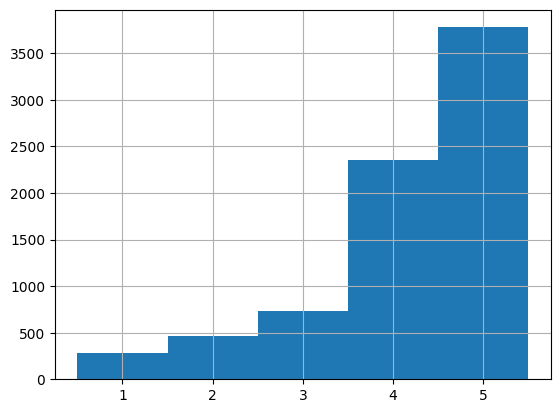

In [50]:
# most coffee shops get 4 or 5 star ratings.
bin_edges = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
df['stars'].hist(bins=bin_edges);

##2.2 Split into two dataframes based on star rating
good: ratings 4 and 5 <br>
bad: ratings <4

In [53]:
# Complete code here
good = df[df['stars'] >= 4]
bad = df[df['stars'] < 4]

In [54]:
# make sure that all reviews are accounted for in one of the two groups
assert df.shape[0] == good.shape[0] + bad.shape[0]

#### Summary of the descriptive token statistics

`word` The specific token that is being analyzed

`appears_in_docs` Number of documents that the word/token appears in

`count` The total number of appearances of that token within the corpus

`rank` Ranking of tokens by count

`fraction_of_total` Fraction of the total tokens that this token makes up

`cumulative_fraction_of_total` Sum of fractional total of ranked tokens, down to and including this token.

`appears_in_fraction_of_docs` Fraction of documents that token appears in

In [62]:
# THIS IS FROM THE GUIDED SOLUTION METHOD

def get_sentiment(rating):
    """
    Accepts a string or object data type star review and returns a numerical score for the review sentiment.tokenizer

    Parameters
    ----------
    rating: string or object

    Returns
    -------
    sentiment score: boolean
    """

    # Strip out the text and convert string number into float point value
    num_rating = float(str(rating)[:2])

    # Assign sentiment numerically
    if num_rating >= 4:
        # 1 means positive sentiment
        return 1
    else:
        # 0 means negative sentiment
        return 0

In [65]:
# THIS IS PART OF THE SENTIMENT METHOD ABOVE
df["sentiment"] = df["star_rating"].apply(lambda rating: get_sentiment(rating))

In [66]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens,lemmas,stars,sentiment
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere every ...,5,2016-11-25,checkin love love loved the atmosphere every ...,"[, checkin, love, love, loved, the, atmosphere...","[checkin, love, love, love, atmosphere, corner...","[checkin, love, love, love, atmosphere, corner...",5,1
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austi...,4,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ...","[list, date, night, austin, ambiance, austin, ...","[list, date, night, austin, ambiance, austin, ...",4,1
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ec...,4,2016-11-30,checkin listed in brunch spots i loved the ec...,"[, checkin, listed, in, brunch, spots, i, love...","[checkin, list, brunch, spot, love, eclectic, ...","[checkin, list, brunch, spot, love, eclectic, ...",4,1
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat...","[cool, decor, good, drink, nice, seating, over...","[cool, decor, good, drink, nice, seating, over...",2,0
4,The Factory - Cafe With a Soul,checkin they are located within the northcros...,4,2016-12-03,checkin they are located within the northcros...,"[, checkin, they, are, located, within, the, n...","[checkin, locate, northcross, mall, shopping, ...","[checkin, locate, northcross, mall, shopping, ...",4,1


In [64]:
good_wc = count(good["spacy_tokens"])
good_wc.head(10)

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
0,coffee,3975,8421,1.0,0.029979,0.029979,0.647394
65,place,3133,4816,2.0,0.017145,0.047124,0.510261
192,good,2934,4372,3.0,0.015564,0.062688,0.477850
87,great,2505,3474,4.0,0.012367,0.075056,0.407980
74,not,2187,3469,5.0,0.012350,0.087405,0.356189
7,checkin,2522,2535,6.0,0.009025,0.096430,0.410749
182,like,1669,2415,7.0,0.008597,0.105027,0.271824
18,love,1608,2117,8.0,0.007537,0.112564,0.261889
44,austin,1570,2012,9.0,0.007163,0.119727,0.255700
349,come,1482,1983,10.0,0.007060,0.126786,0.241368


In [57]:
bad_wc = count(bad["spacy_tokens"])
bad_wc.head(10)

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
1,coffee,948,2172,1.0,0.027449,0.027449,0.642276
65,not,868,1706,2.0,0.021560,0.049009,0.588076
13,place,755,1228,3.0,0.015519,0.064528,0.511518
32,good,647,998,4.0,0.012612,0.077141,0.438347
16,like,592,937,5.0,0.011842,0.088982,0.401084
80,order,439,772,6.0,0.009756,0.098739,0.297425
135,come,452,649,7.0,0.008202,0.106941,0.306233
200,time,420,610,8.0,0.007709,0.114650,0.284553
24,drink,363,608,9.0,0.007684,0.122333,0.245935
109,food,316,494,10.0,0.006243,0.128576,0.214092


##2.3 Visualize top 20 `good` and top 20 `bad` tokens using a word cloud

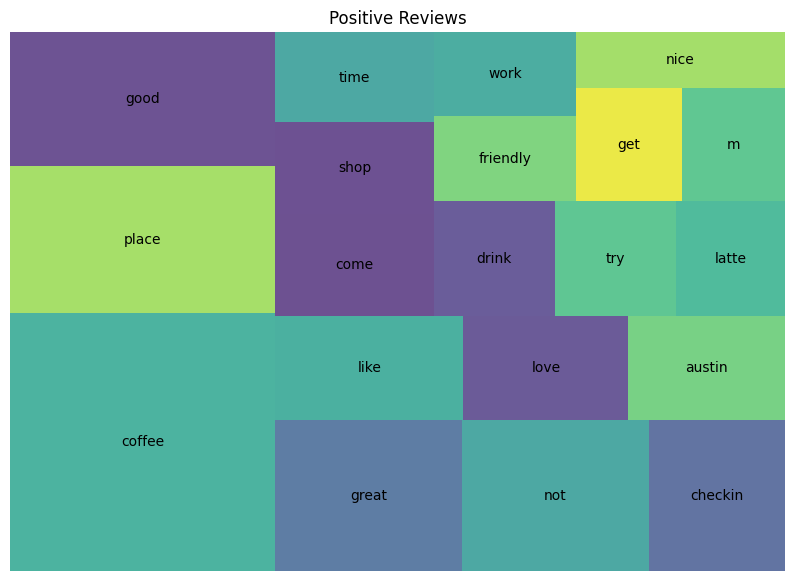

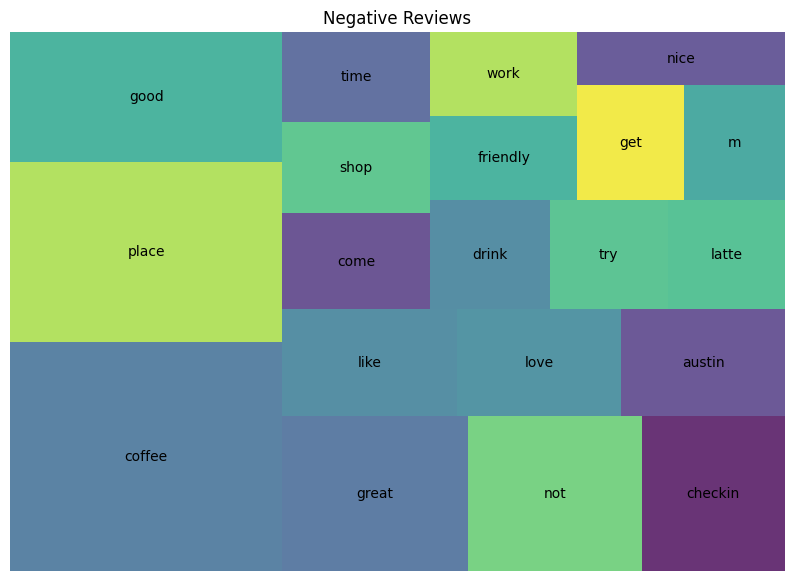

In [72]:
# COMPLETE CODE HERE
good_top20 = good_wc[good_wc['rank'] <= 20]
plt.figure(figsize=(10,7))
squarify.plot(sizes=good_top20['fraction_of_total'], label=good_top20['word'], alpha=.8)
plt.title("Positive Reviews")
plt.axis('off')
plt.show()

bad_top20 = bad_wc[bad_wc['rank'] <= 20]
plt.figure(figsize=(10,7))
squarify.plot(sizes=bad_top20['fraction_of_total'], label=good_top20['word'], alpha=.8)
plt.title("Negative Reviews")
plt.axis('off')
plt.show()

In [67]:
# THIS IS A CONTINUATION OF THE SOLUTION VIDEO THAT IS DOING ITS OWN THING
df_wc = count(df["lemmas"])

In [69]:
df_wc.head(10)

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
0,coffee,4923,10593,1.0,0.029423,0.029423,0.646402
65,place,3888,6044,2.0,0.016788,0.046211,0.510504
159,good,3581,5370,3.0,0.014916,0.061126,0.470194
74,not,3055,5175,4.0,0.014374,0.075500,0.401129
87,great,2853,3946,5.0,0.010960,0.086460,0.374606
146,like,2261,3352,6.0,0.009310,0.095771,0.296875
7,checkin,2980,2996,7.0,0.008322,0.104092,0.391282
425,come,1934,2632,8.0,0.007311,0.111403,0.253939
18,love,1818,2371,9.0,0.006586,0.117989,0.238708
455,time,1748,2370,10.0,0.006583,0.124572,0.229517


## 3. Find out which words are likely to occur in "good" and "bad" reviews
Ok - let's do a more thorough analysis! <br>
Looking at `df_pos_wc` and `df_neg_wc` we notice that certain words are ranked higher in one data set and lower in the other.

In [109]:
# these are words that are ranked high in one data set but not the other
# you might try working with two keyword lists -- one for the good reviews and one for the bad reviews
good_key_words = good_top20['word'].to_list()
bad_key_words = bad_top20['word'].to_list()
print(good_key_words)
print(bad_key_words)

['coffee', 'place', 'good', 'great', 'not', 'checkin', 'like', 'love', 'austin', 'come', 'shop', 'time', 'drink', 'try', 'latte', 'friendly', 'work', 'get', 'm', 'nice']
['coffee', 'not', 'place', 'good', 'like', 'order', 'come', 'time', 'drink', 'food', 'great', 'checkin', 'm', 'go', 'service', 'get', 'try', 'shop', 'work', 've']


In [110]:
good_wc.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
0,coffee,3975,8421,1.0,0.029979,0.029979,0.647394
65,place,3133,4816,2.0,0.017145,0.047124,0.510261
192,good,2934,4372,3.0,0.015564,0.062688,0.477850
87,great,2505,3474,4.0,0.012367,0.075056,0.407980
74,not,2187,3469,5.0,0.012350,0.087405,0.356189


In [112]:
df_pos_keywords_mask = good_wc.word.isin(good_key_words)
df_pos_keywords = good_wc[df_pos_keywords_mask]
df_pos_keywords.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
0,coffee,3975,8421,1.0,0.029979,0.029979,0.647394
65,place,3133,4816,2.0,0.017145,0.047124,0.510261
192,good,2934,4372,3.0,0.015564,0.062688,0.477850
87,great,2505,3474,4.0,0.012367,0.075056,0.407980
74,not,2187,3469,5.0,0.012350,0.087405,0.356189


In [113]:
df_neg_keywords_mask = bad_wc.word.isin(bad_key_words)
df_neg_keywords = bad_wc[df_neg_keywords_mask]
df_neg_keywords.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
1,coffee,948,2172,1.0,0.027449,0.027449,0.642276
65,not,868,1706,2.0,0.021560,0.049009,0.588076
13,place,755,1228,3.0,0.015519,0.064528,0.511518
32,good,647,998,4.0,0.012612,0.077141,0.438347
16,like,592,937,5.0,0.011842,0.088982,0.401084


<ipython-input-116-d60bf5e24147>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_pos_keywords.word, y=df_pos_keywords.appears_in_fraction_of_docs, palette="rocket", order=good_key_words);


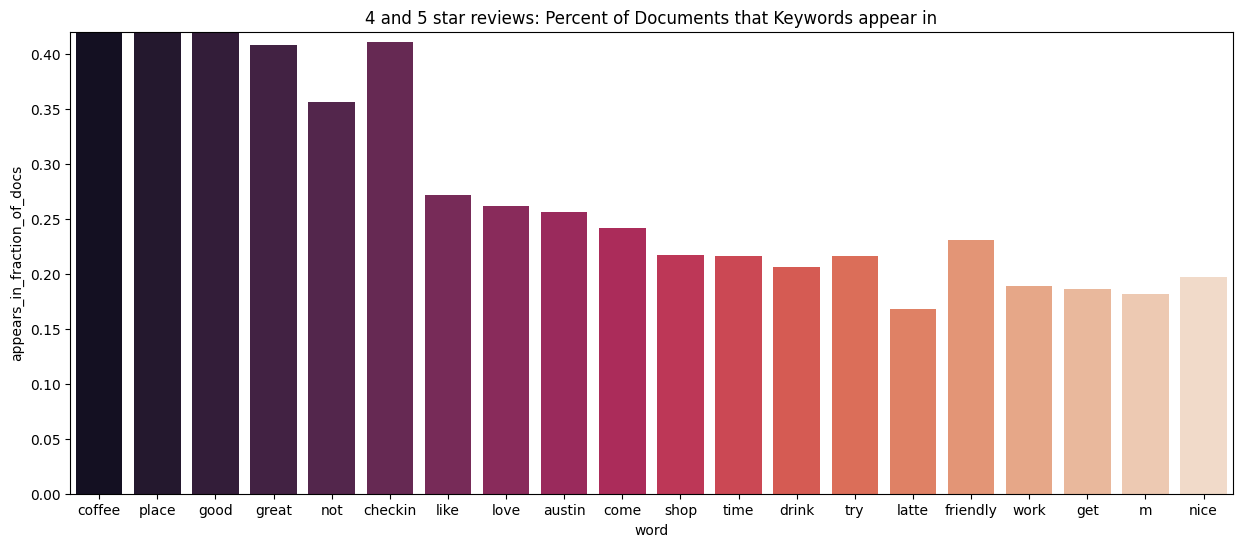

<ipython-input-116-d60bf5e24147>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_neg_keywords.word, y=df_neg_keywords.appears_in_fraction_of_docs, palette="rocket", order=good_key_words);


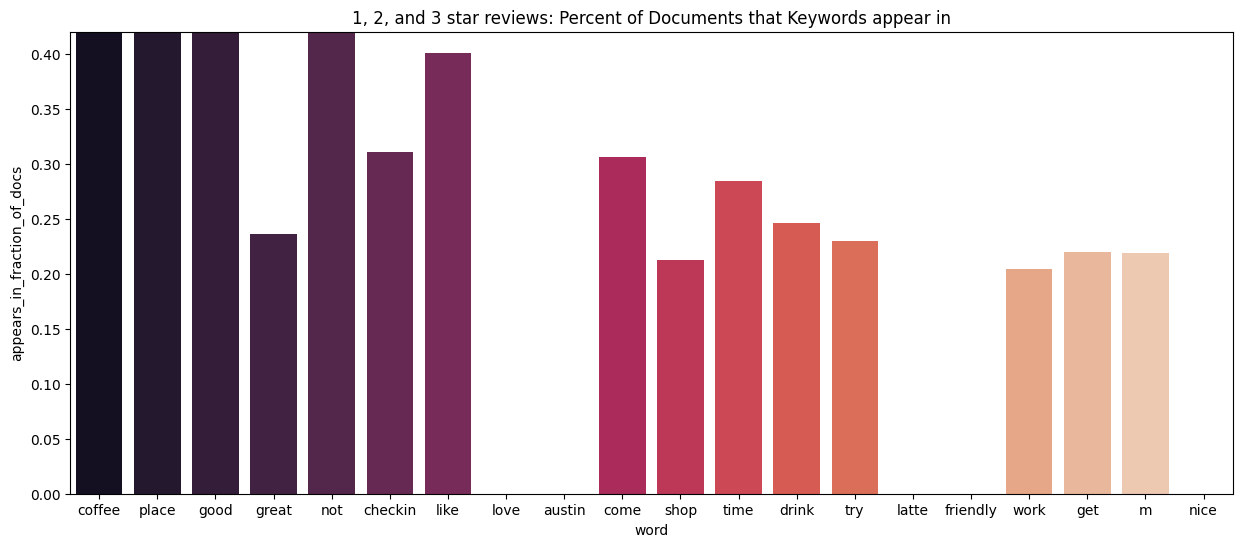

In [116]:
import seaborn as sns

plt.figure(figsize=(15,6))
plt.title("4 and 5 star reviews: Percent of Documents that Keywords appear in")
sns.barplot(x=df_pos_keywords.word, y=df_pos_keywords.appears_in_fraction_of_docs, palette="rocket", order=good_key_words);
plt.ylim(0,.42)
plt.show();

plt.figure(figsize=(15,6))
plt.title("1, 2, and 3 star reviews: Percent of Documents that Keywords appear in")
sns.barplot(x=df_neg_keywords.word, y=df_neg_keywords.appears_in_fraction_of_docs, palette="rocket", order=good_key_words);
plt.ylim(0,.42)
plt.show();

In [89]:
# THIS IS AN ALTERNATE TO THE METHOD ABOVE FROM THE SOLUTION VIDEO
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens,lemmas,stars,sentiment
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere every ...,5,2016-11-25,checkin love love loved the atmosphere every ...,"[, checkin, love, love, loved, the, atmosphere...","[checkin, love, love, love, atmosphere, corner...","[checkin, love, love, love, atmosphere, corner...",5,1
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austi...,4,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ...","[list, date, night, austin, ambiance, austin, ...","[list, date, night, austin, ambiance, austin, ...",4,1
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ec...,4,2016-11-30,checkin listed in brunch spots i loved the ec...,"[, checkin, listed, in, brunch, spots, i, love...","[checkin, list, brunch, spot, love, eclectic, ...","[checkin, list, brunch, spot, love, eclectic, ...",4,1
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat...","[cool, decor, good, drink, nice, seating, over...","[cool, decor, good, drink, nice, seating, over...",2,0
4,The Factory - Cafe With a Soul,checkin they are located within the northcros...,4,2016-12-03,checkin they are located within the northcros...,"[, checkin, they, are, located, within, the, n...","[checkin, locate, northcross, mall, shopping, ...","[checkin, locate, northcross, mall, shopping, ...",4,1


In [91]:
pos_mask = df.sentiment == 1
neg_mask = df.sentiment == 0

df_pos = df[pos_mask]
df_neg = df[neg_mask]

In [92]:
df_pos.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens,lemmas,stars,sentiment
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere every ...,5,2016-11-25,checkin love love loved the atmosphere every ...,"[, checkin, love, love, loved, the, atmosphere...","[checkin, love, love, love, atmosphere, corner...","[checkin, love, love, love, atmosphere, corner...",5,1
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austi...,4,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ...","[list, date, night, austin, ambiance, austin, ...","[list, date, night, austin, ambiance, austin, ...",4,1
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the ec...,4,2016-11-30,checkin listed in brunch spots i loved the ec...,"[, checkin, listed, in, brunch, spots, i, love...","[checkin, list, brunch, spot, love, eclectic, ...","[checkin, list, brunch, spot, love, eclectic, ...",4,1
4,The Factory - Cafe With a Soul,checkin they are located within the northcros...,4,2016-12-03,checkin they are located within the northcros...,"[, checkin, they, are, located, within, the, n...","[checkin, locate, northcross, mall, shopping, ...","[checkin, locate, northcross, mall, shopping, ...",4,1
5,The Factory - Cafe With a Soul,checkin very cute cafe i think from the momen...,4,2016-11-20,checkin very cute cafe i think from the momen...,"[, checkin, very, cute, cafe, i, think, from, ...","[checkin, cute, cafe, think, moment, step, not...","[checkin, cute, cafe, think, moment, step, not...",4,1


In [93]:
df_neg.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens,lemmas,stars,sentiment
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat...","[cool, decor, good, drink, nice, seating, over...","[cool, decor, good, drink, nice, seating, over...",2,0
8,The Factory - Cafe With a Soul,checkin ok lets try this approach pros music ...,3,2016-10-25,checkin ok lets try this approach pros music ...,"[, checkin, ok, lets, try, this, approach, pro...","[checkin, ok, let, try, approach, pro, music, ...","[checkin, ok, let, try, approach, pro, music, ...",3,0
11,The Factory - Cafe With a Soul,the store has a decoration but honestly the c...,3,2016-11-20,the store has a decoration but honestly the c...,"[, the, store, has, a, decoration, but, honest...","[store, decoration, honestly, coffee, good, co...","[store, decoration, honestly, coffee, good, co...",3,0
12,The Factory - Cafe With a Soul,checkin listed in the third time is a charm t...,3,2016-11-17,checkin listed in the third time is a charm t...,"[, checkin, listed, in, the, third, time, is, ...","[checkin, list, time, charm, factory, decor, i...","[checkin, list, time, charm, factory, decor, i...",3,0
25,The Factory - Cafe With a Soul,okay so after visiting my friends in la and t...,1,2016-12-02,okay so after visiting my friends in la and t...,"[, okay, so, after, visiting, my, friends, in,...","[okay, visit, friend, la, try, mint, mojito, i...","[okay, visit, friend, la, try, mint, mojito, i...",1,0


In [94]:
assert df_pos.sentiment.all() == True

In [95]:
assert df_neg.sentiment.any() == False

In [96]:
N_pos_reviews = df_pos.shape[0]
N_neg_reviews = df_neg.shape[0]
N_total_reviews = df.shape[0]

print(f"There are {N_pos_reviews} positive reviews and {N_neg_reviews} negative reviews")

There are 6140 positive reviews and 1476 negative reviews


## Re-apply the count function on each split

In [97]:
df_pos_wc = count(df_pos["lemmas"])
df_neg_wc = count(df_neg.lemmas) # This line looks different but it does the same thing

## Sort through the results and make some observations

In [98]:
df_pos_wc.head(10)

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
0,coffee,3975,8421,1.0,0.029979,0.029979,0.647394
65,place,3133,4816,2.0,0.017145,0.047124,0.510261
192,good,2934,4372,3.0,0.015564,0.062688,0.477850
87,great,2505,3474,4.0,0.012367,0.075056,0.407980
74,not,2187,3469,5.0,0.012350,0.087405,0.356189
7,checkin,2522,2535,6.0,0.009025,0.096430,0.410749
182,like,1669,2415,7.0,0.008597,0.105027,0.271824
18,love,1608,2117,8.0,0.007537,0.112564,0.261889
44,austin,1570,2012,9.0,0.007163,0.119727,0.255700
349,come,1482,1983,10.0,0.007060,0.126786,0.241368


In [102]:
cols = ["word", "appears_in_fraction_of_docs"]

In [100]:
df_neg_wc.head(10)

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
1,coffee,948,2172,1.0,0.027449,0.027449,0.642276
65,not,868,1706,2.0,0.021560,0.049009,0.588076
13,place,755,1228,3.0,0.015519,0.064528,0.511518
32,good,647,998,4.0,0.012612,0.077141,0.438347
16,like,592,937,5.0,0.011842,0.088982,0.401084
80,order,439,772,6.0,0.009756,0.098739,0.297425
135,come,452,649,7.0,0.008202,0.106941,0.306233
200,time,420,610,8.0,0.007709,0.114650,0.284553
24,drink,363,608,9.0,0.007684,0.122333,0.245935
109,food,316,494,10.0,0.006243,0.128576,0.214092


In [103]:
df_pos_wc.iloc[:10][cols]

,word,appears_in_fraction_of_docs
0,coffee,0.647394
65,place,0.510261
192,good,0.477850
87,great,0.407980
74,not,0.356189
7,checkin,0.410749
182,like,0.271824
18,love,0.261889
44,austin,0.255700
349,come,0.241368


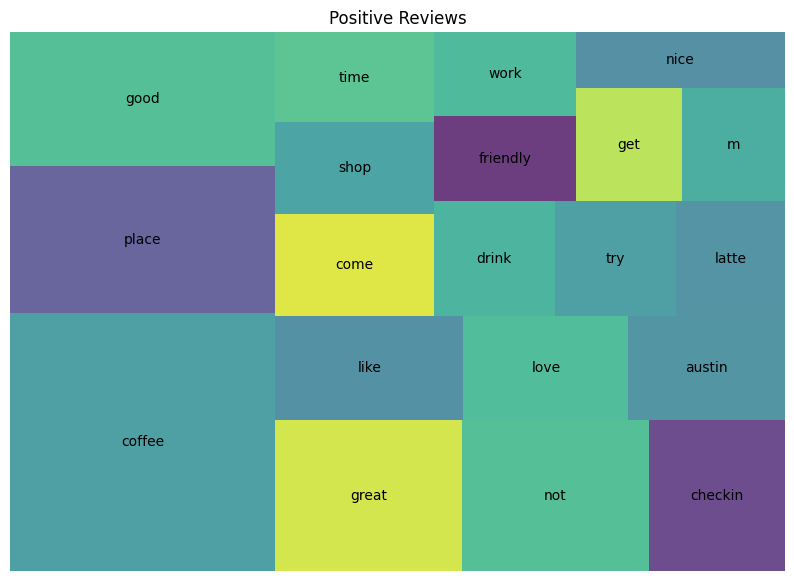

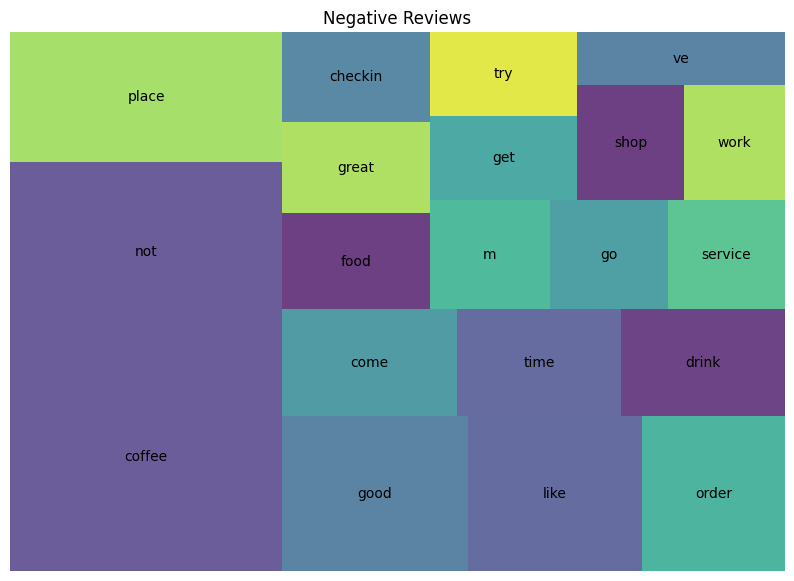

In [104]:
top_N_tokens = 20

wc_top20 = df_pos_wc[df_pos_wc['rank'] <= top_N_tokens]

plt.figure(figsize=(10,7))
squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8)
plt.title("Positive Reviews")
plt.axis('off')
plt.show()

wc_top20 = df_neg_wc[df_neg_wc['rank'] <= top_N_tokens]

plt.figure(figsize=(10,7))
squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8)
plt.title("Negative Reviews")
plt.axis('off')
plt.show()